# Near Earth Objects

Carlos Patricio Castañeda Bustamante

Maestria en ingenieria en computacion



## Importamos las librerias pertinentes

In [1]:
import sys
# Append the directory, not the file
sys.path.append('/Volumes/Maestria/GitHub/NEO/NEO/API_test/')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.impute import SimpleImputer
from pandas.plotting import scatter_matrix
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from joblib import dump, load
import os
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn import svm
from sklearn.svm import SVC
from imblearn.pipeline import make_pipeline
from sklearn.svm import LinearSVR
from sklearn.svm import LinearSVC


import pickle as pkl
import sys


import dataprocess as dp

## Dataframe

Nombramos a nuestro dataframe 'df' y le asignamos los valores del csv que contiene nuestra base de datos.


Imprimimos los 5 primeros valores para ver nuestra tabla inicial de valores

In [34]:
df = pd.read_csv('/Volumes/Maestria/GitHub/NEO/NEO/nearest-earth-objects(1910-2024).csv')
df.head()

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False


Imprimimos la forma de nuestro dataframe para saber con cuantos datos estamos trabajando

In [35]:
df.shape

(338199, 9)

Imprimimos las columnas del dataframe

In [36]:
df.columns

#neo_id .- Unique Identifier for each Asteroid
#name .- Name given by NASA
#absolute_magnitude .- Describes intrinsic luminosity
#estimated_diameter_min.- Minimum Estimated Diameter in Kilometres
#orbiting_body .- Planet that the asteroid orbits
# estimated_diameter_max .- Maximum Estimated Diameter in Kilometres
#relative_velocity .- Velocity Relative to Earth in Kmph
#miss_distance .- Distance in Kilometres missed
#is_hazardous .- Boolean feature that shows whether asteroid is harmful or not

Index(['neo_id', 'name', 'absolute_magnitude', 'estimated_diameter_min',
       'estimated_diameter_max', 'orbiting_body', 'relative_velocity',
       'miss_distance', 'is_hazardous'],
      dtype='object')

Imprimimos una descripcion transpuesta de nuestro dataframe, para ver el comportamiento de las variables numericas

In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
neo_id,338199.0,1.759939e+07,2.287225e+07,2.000433e+06,3.373980e+06,3.742127e+06,5.405374e+07,5.446281e+07
absolute_magnitude,338171.0,2.293252e+01,2.911216e+00,9.250000e+00,2.074000e+01,2.280000e+01,2.510000e+01,3.358000e+01
estimated_diameter_min,338171.0,1.578120e-01,3.138851e-01,5.111578e-04,2.538370e-02,7.320740e-02,1.890406e-01,3.754525e+01
estimated_diameter_max,338171.0,3.528785e-01,7.018685e-01,1.142983e-03,5.675969e-02,1.636967e-01,4.227075e-01,8.395373e+01
relative_velocity,338199.0,5.106066e+04,2.639924e+04,2.033464e+02,3.071203e+04,4.756047e+04,6.667382e+04,2.917811e+05
miss_distance,338199.0,4.153535e+07,2.077399e+07,6.745533e+03,2.494540e+07,4.332674e+07,5.933961e+07,7.479865e+07


Buscamos si tenemos valores nulos en nuestro dataframe, en este caso, hay 28 valores nulos.

In [38]:
df.isnull().sum()

neo_id                     0
name                       0
absolute_magnitude        28
estimated_diameter_min    28
estimated_diameter_max    28
orbiting_body              0
relative_velocity          0
miss_distance              0
is_hazardous               0
dtype: int64

El dataframe no tiene valores duplicados

In [39]:
df.duplicated().sum()

0

Imprimimos la informacion de nuestro dataframe, donde podemos ver los 28 valores faltantes, y cual es el tipo de nuestras variables

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 21.0+ MB


## Exploratory Data Analysis and preprocessing

Iniciamos nuestro proceso de exploracion de datos y preprocesamiento, quitando la columna de 'name' de nuestro dataframe

In [41]:
df = df.drop(columns=['name'], axis=1)


Confirmamos que ya no tenemos la columna

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   absolute_magnitude      338171 non-null  float64
 2   estimated_diameter_min  338171 non-null  float64
 3   estimated_diameter_max  338171 non-null  float64
 4   orbiting_body           338199 non-null  object 
 5   relative_velocity       338199 non-null  float64
 6   miss_distance           338199 non-null  float64
 7   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(1)
memory usage: 18.4+ MB


Imprimimos un histograma para ver la distribucion de las magnitudes

<Axes: xlabel='absolute_magnitude', ylabel='Count'>

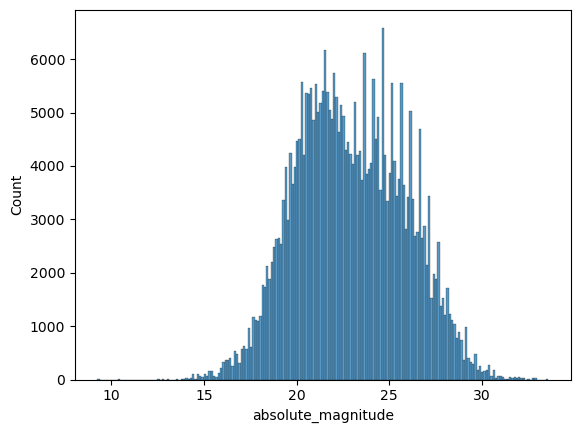

In [15]:
sns.histplot(df['absolute_magnitude'])

Imprimimos un histograma para ver la distribucion de la velocidad relativa

<Axes: xlabel='relative_velocity', ylabel='Count'>

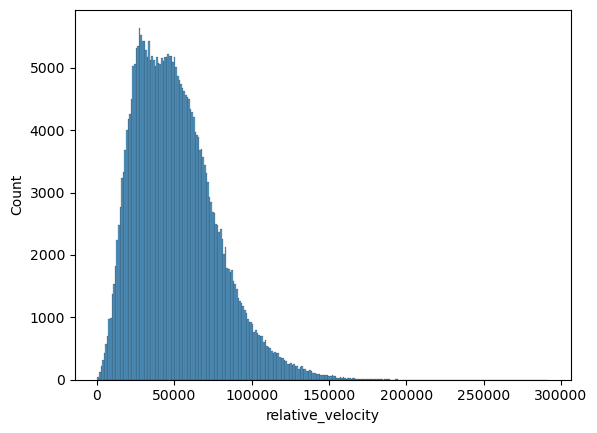

In [16]:
sns.histplot(df['relative_velocity'])

Imprimimos un histograma para ver la distribucion de nuestras distancias

<Axes: xlabel='miss_distance', ylabel='Count'>

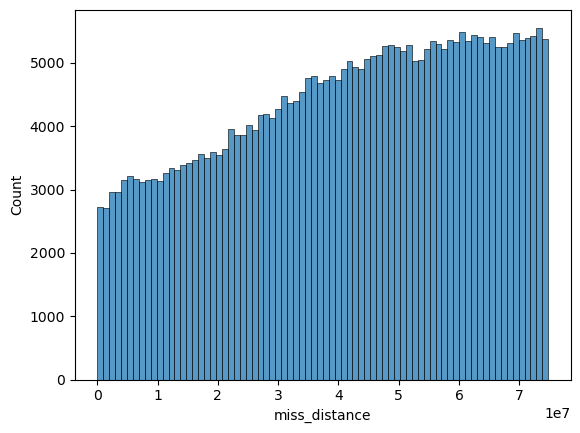

In [17]:
sns.histplot(df['miss_distance'])

Imprimimos un scatterplot para ver como se comporta la variable de la magnitud, con el diametro maximo de los asteroides, separandolo por si es peligroso o no

<Axes: xlabel='absolute_magnitude', ylabel='estimated_diameter_max'>

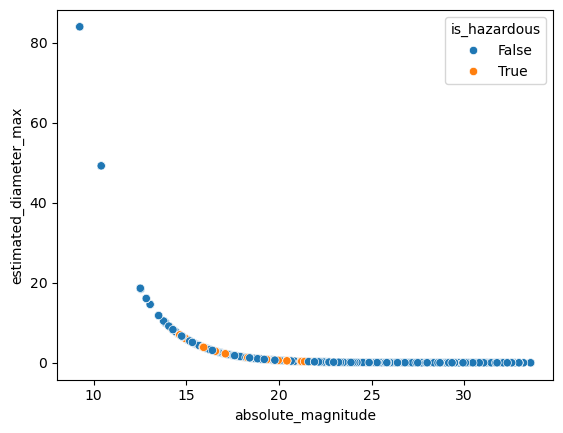

In [18]:
sns.scatterplot(x='absolute_magnitude', y='estimated_diameter_max', data=df, hue='is_hazardous')

Imprimimos un scatterplot para comparar la velocidad relativa con la magnitud absoluta del objeto, y lo separamos si es peligroso o no

<Axes: xlabel='absolute_magnitude', ylabel='relative_velocity'>

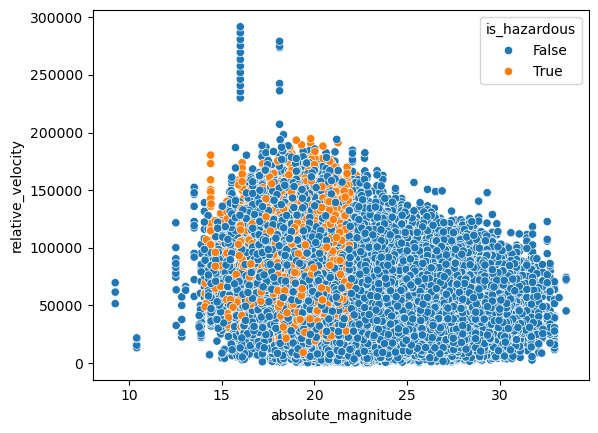

In [19]:
sns.scatterplot(x='absolute_magnitude', y='relative_velocity', data=df, hue='is_hazardous')

Imprimimos un pairplot de toda nuestra base de datos para encontrar relaciones importantes entre ellas

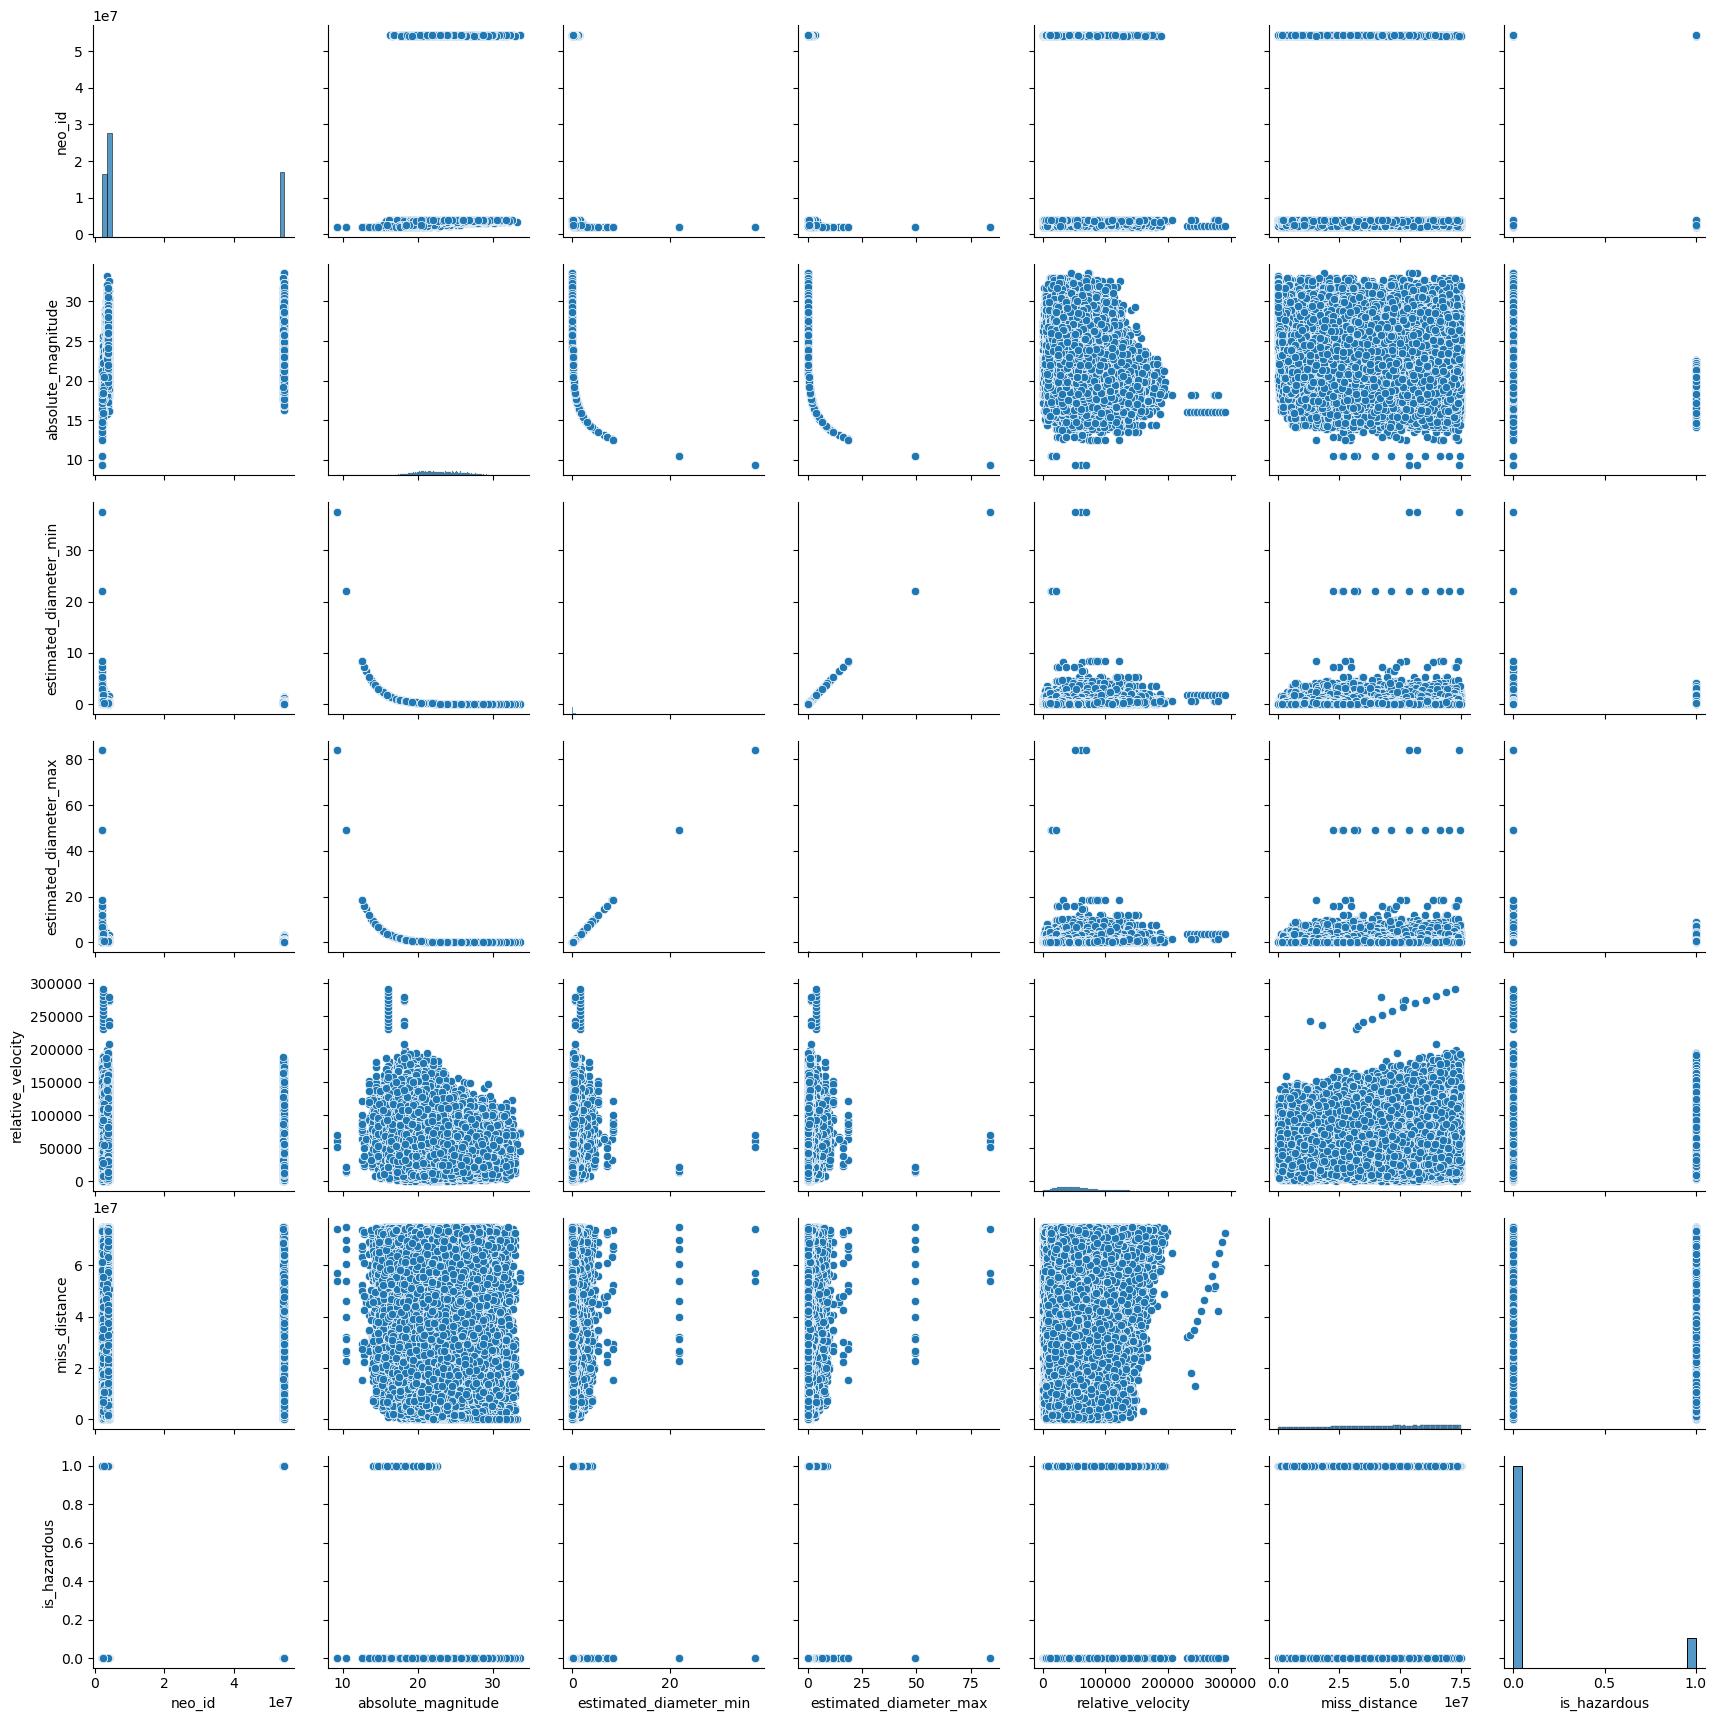

In [20]:
sns.pairplot(df)

In [21]:
# df_cat = df[['orbiting_body', 'is_hazardous']]
# encoder = OneHotEncoder()
# encoded_data = encoder.fit_transform(df_cat).toarray()
# columns = encoder.get_feature_names_out(['orbiting_body', 'is_hazardous'])
# df_encoded = pd.DataFrame(encoded_data, columns=columns)
# df_final = pd.concat([df.drop(columns=['orbiting_body', 'is_hazardous']), df_encoded], axis=1)

# df_final.drop(columns=['is_hazardous_False'], inplace=True)

Quitamos de nuestra base de datos las columnas de 'neo_id' y 'orbiting_body' ya que no aportan mucha informacion

In [43]:
df.drop(columns=['neo_id', 'orbiting_body'], inplace=True)
df.head()

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous
0,19.14,0.394962,0.883161,71745.401048,5.814362e+07,False
1,18.50,0.530341,1.185878,109949.757148,5.580105e+07,True
2,21.45,0.136319,0.304818,24865.506798,6.720689e+07,False
3,20.63,0.198863,0.444672,78890.076805,3.039644e+07,False
4,22.70,0.076658,0.171412,56036.519484,6.311863e+07,False


Aplicamos un LabelEncoder a nuestra variable categorica 'is_hazardous' para obtener una nueva columna que contenga 0 o 1, segun si es peligroso o no

In [44]:
le = LabelEncoder()

df['is_hazardous'] = le.fit_transform(df['is_hazardous'])

df.head()




,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous
0,19.14,0.394962,0.883161,71745.401048,5.814362e+07,0
1,18.50,0.530341,1.185878,109949.757148,5.580105e+07,1
2,21.45,0.136319,0.304818,24865.506798,6.720689e+07,0
3,20.63,0.198863,0.444672,78890.076805,3.039644e+07,0
4,22.70,0.076658,0.171412,56036.519484,6.311863e+07,0


Imprimimos un mapa de calor para poder ver visualmente las correlaciones entre las variables

<Axes: >

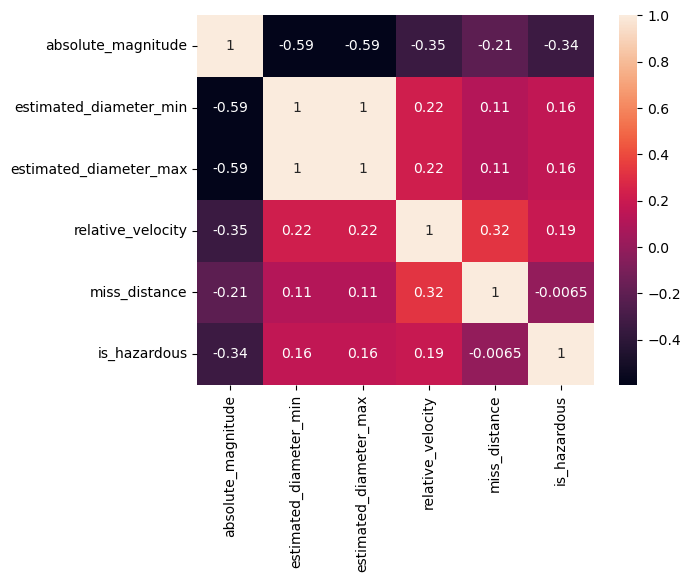

In [24]:
sns.heatmap(df.corr(), annot=True)

Imprimimos una variable de correlacion para poder tener una perspectiva diferente de las correlaciones

In [25]:
corr_matrix = df.corr()

corr_matrix['is_hazardous'].sort_values(ascending=False)

is_hazardous              1.000000
relative_velocity         0.187021
estimated_diameter_min    0.164841
estimated_diameter_max    0.164841
miss_distance            -0.006540
absolute_magnitude       -0.343996
Name: is_hazardous, dtype: float64

Quitamos los renglones de nuestro dataframe que esten vacios

In [45]:
df = df.dropna()

Imprimimos la forma de nuestro dataframe para confirmar 

In [46]:
df.shape

(338171, 6)

Y volvemos a buscar si hay valores nulos en el dataframe

In [28]:
df.isnull().sum()

absolute_magnitude        0
estimated_diameter_min    0
estimated_diameter_max    0
relative_velocity         0
miss_distance             0
is_hazardous              0
dtype: int64

In [29]:


# df_test = df.copy()

# sm = SMOTE(sampling_strategy='minority', random_state=42)

# oversampled_X, oversampled_Y = sm.fit_resample(df_test.drop('is_hazardous', axis=1), df_test['is_hazardous'])
# df = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)




In [47]:
df = dp.OverallProcessor(df).rus()


In [48]:
df.shape

(86324, 6)

In [49]:
df.shape
df.head()

,is_hazardous,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance
0,0,21.67,0.123184,0.275448,81705.890467,2.196432e+07
1,0,21.54,0.130784,0.292442,30815.694534,1.310723e+07
2,0,21.23,0.150853,0.337318,55318.270293,2.625821e+07
3,0,21.50,0.133216,0.297879,76058.326965,3.555452e+07
4,0,20.05,0.259750,0.580818,52488.812404,3.396581e+07


Separamos en 2 nuevos dataframes nuestros valores X, y

df_target será nuestro 'y', separamos la columna de 'is_hazardous'

Convertimos el nuevo dataframe a un array y lo llamamos df_target_array

In [50]:
df_target = df['is_hazardous']
df_target_array = df_target.values

Creamos un pipeline donde aplicamos un standard scaler a nuestras variables numericas

In [51]:
preprocess = ColumnTransformer([
    ('scaler', StandardScaler(), ['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max', 'relative_velocity', 'miss_distance'])
])

pipeline = Pipeline([
    ('preprocess', preprocess)])

df_preprocessed = pipeline.fit_transform(df)
df_preprocessed


returned_path = dump(pipeline, "/Volumes/Maestria/GitHub/NEO/NEO/Exports/pipeline.sav")




## Training

Creamos la separacion del dataframe en train y test, con una razón de 80/20, utilizando nuestros datos procesados por el pipeline y el array de nuestro target

In [52]:
X_train, X_test, y_train, y_test = train_test_split(df_preprocessed, df_target_array, test_size=0.2, random_state=42)

In [55]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((69059, 5), (69059,), (17265, 5), (17265,))

### Logistic Regression

En una variable, nombramos nuestro primer modelo, LogisticRegression

Imprimimos los parametros que LogisticRegression utiliza

In [53]:
log_reg = LogisticRegression()
log_reg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

Creamos un GridSearch, utilizando los parametros de, solver, penalty, C, multi_class, y fit intercept, para encontrar el mejor modelo con esos parametros

In [54]:
param_grid = {'solver': ['liblinear', 'newton-cholesky'],
              'penalty':['none', 'l2'],
              'C':[0.001, 0.01, 0.1, 1, 10, 100],
              'n_jobs': [8],
              'random_state': [0, 42, 32]
              #'multi_class': ['auto', 'ovr', 'multinomial'],
              ,'fit_intercept': [True, False],
              'warm_start': [True, False]
}

grid_search = GridSearchCV(log_reg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(f'Best parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_}')
print(f'Best Estimator: {grid_search.best_estimator_} ')

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. 

Best parameters: {'C': 0.1, 'fit_intercept': False, 'n_jobs': 8, 'penalty': 'l2', 'random_state': 0, 'solver': 'liblinear', 'warm_start': True}
Best Score: 0.8075413473057516
Best Estimator: LogisticRegression(C=0.1, fit_intercept=False, n_jobs=8, random_state=0,
                   solver='liblinear', warm_start=True) 


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
720 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/opt/anaconda3/lib/python3.12/site-

Escogemos nuestro mejor modelo de acuerdo a los parametros arrojados y lo entrenamos con nuestra particion

Imprimimos el accuracy, recall, f1 score y la prediccion

In [33]:
#Different GScv test. Ignore this

#grid_search.best_estimator_ = LogisticRegression(C=0.001, n_jobs=8, penalty='l2', solver='newton-cholesky', random_state=42)
#grid_search.best_estimator_ = LogisticRegression(C=100, n_jobs=8, random_state=0, solver='liblinear',warm_start=True) 
#grid_search.best_estimator_ =  LogisticRegression(C=0.001, fit_intercept=False, n_jobs=8, random_state=0,solver='liblinear', warm_start=True) 

In [56]:
best_model_log = grid_search.best_estimator_
best_model_log.fit(X_train, y_train)

predictionlog = best_model_log.predict(X_test)

accuracylog = accuracy_score(y_test, predictionlog)
recallog = recall_score(predictionlog, y_test)
f1log = f1_score(predictionlog, y_test)

print (f'The accuracy score is {accuracylog}, The recall score is {recallog}, The f1 score is {f1log}')
print(predictionlog)

The accuracy score is 0.8060816681146828, The recall score is 0.7361011477761836, The f1 score is 0.8306182333299605
[1 1 0 ... 0 1 1]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


Segun la literatura, la regresion logistica regresa entre 85 a 90% de accuracy, los resultados obtenidos caen dentro del rango, y su comportamiento puede que sea dado por la gran cantidad de datos presentes

In [57]:
print(f'Classification Report: \n {classification_report(y_test, predictionlog)}')

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.66      0.77      8651
           1       0.74      0.95      0.83      8614

    accuracy                           0.81     17265
   macro avg       0.83      0.81      0.80     17265
weighted avg       0.84      0.81      0.80     17265



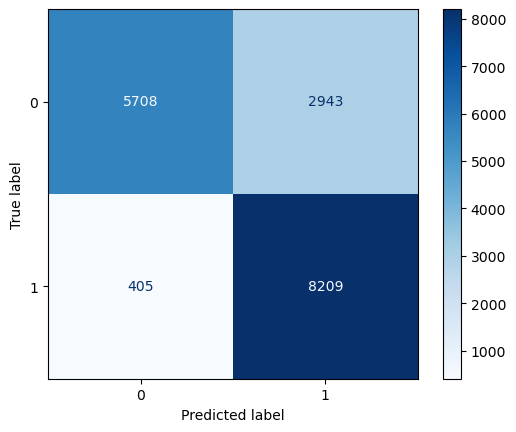

<Axes: >

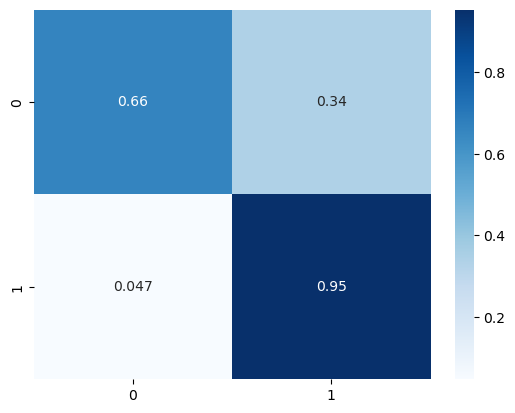

In [58]:
#Confusion Matrix

cm_log = confusion_matrix(y_test, predictionlog)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_log)
disp.plot(cmap='Blues')
plt.show()

cm1 = cm_log / cm_log.sum(axis=1)[:, np.newaxis]

sns.heatmap(cm1, annot=True, cmap='Blues')

In [38]:
# # Learning plots

# lc = learning_curve(best_model, X_train, y_train, cv=5, n_jobs=8)

# train_sizes, train_scores, test_scores = lc
# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)

# plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
#          label="Training score")
# plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
#          label="Cross-validation score")

# plt.legend(loc="best")
# plt.show()

### Support Vector Machine

#### Gaussian kernel

Declaramos la variable svm con un kernel gaussiano e imprimimos los parametros que puede manejar este modelo

In [59]:
# Support Vector Machine

svm = SVC(kernel='rbf', random_state=42)
svm.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 42,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

Creamos un parameter grid que contiene los parametros y las variables que utiliza para utilizarlo en un gridsearch para econtrar el best estimator.

Debido al volumen de datos en nuestra base de datos, hemos optado por limitar el grid search a 20,000 samples, ya que el proceso de ajuste (fit) con la base de datos entera consumió demasiado tiempo.

In [60]:
# indices = np.random.choice(X_train.shape[0], 20000, replace=False)  

# X_train_sample = X_train[indices]
# y_train_sample = y_train[indices]

# param_grid = {
#     'C' : [2000, 5000, 10000],
#     'gamma' : ['scale', 'auto']
# }


# grid_search = GridSearchCV(svm, param_grid, cv=5, n_jobs=-1)


# grid_search.fit(X_train_sample, y_train_sample)

# print(f"Best parameters: {grid_search.best_params_}")
# print(f"Best score: {grid_search.best_score_}")
# print(f"Best estimator: {grid_search.best_estimator_}")

# grid_search.best_estimator_svm = grid_search.best_estimator_

KeyboardInterrupt: 

Seleccionamos el best estimator y lo llamamos bestsvm, con este haremos fit a nuestros sets de entrenamiento y mostramemos el accuracy, recall y f1 score seguido de un classification report

Por la cantidad de datos existentes, se selecciona solo un sample de la base de datos original

In [61]:
grid_search.best_estimator_svm = SVC(C=10000, random_state=42, kernel='rbf', gamma='scale')

indices = np.random.choice(X_train.shape[0], 20000, replace=False)  

X_train_sample = X_train[indices]
y_train_sample = y_train[indices]

bestsvm = grid_search.best_estimator_svm
bestsvm.fit(X_train_sample, y_train_sample)

predictionsvm = bestsvm.predict(X_test)

accuracysvm = accuracy_score(y_test, predictionsvm)
recallsvm = recall_score(y_test, predictionsvm)
f1svm = f1_score(y_test, predictionsvm)

print(f"Accuracy: {accuracysvm}")
print(f"Recall: {recallsvm}")
print(f"F1 score: {f1svm}")


print(f'Classification Report: \n {classification_report(y_test, predictionsvm)}')


Accuracy: 0.8328989284679988
Recall: 0.9837473879730672
F1 score: 0.8545353703423587
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.68      0.80      8651
           1       0.76      0.98      0.85      8614

    accuracy                           0.83     17265
   macro avg       0.87      0.83      0.83     17265
weighted avg       0.87      0.83      0.83     17265



Mostramos una matriz de confusion para nuestro modelo de svm

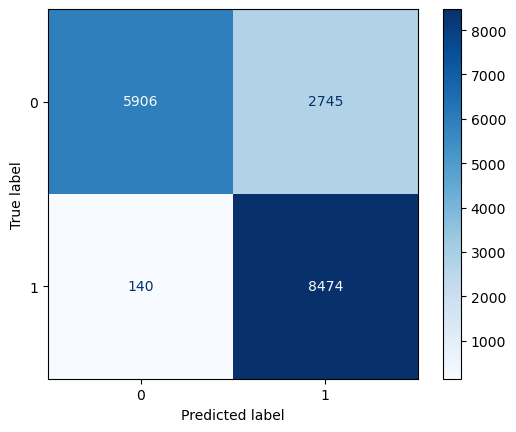

<Axes: >

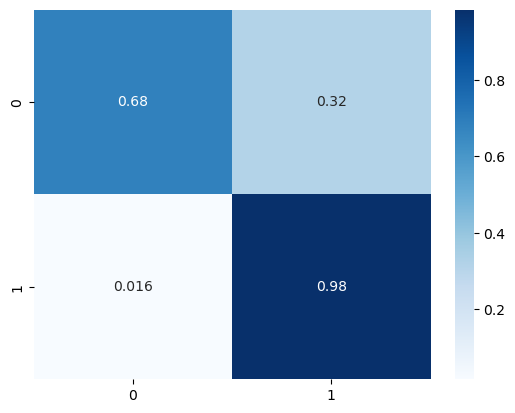

In [62]:
cmsvm = confusion_matrix(y_test, predictionsvm)
disp = ConfusionMatrixDisplay(confusion_matrix=cmsvm)
disp.plot(cmap='Blues')
plt.show()

cm2 = cmsvm / cmsvm.sum(axis=1)[:, np.newaxis]

sns.heatmap(cm2, annot=True, cmap='Blues')


#### Lineal Kernel

Se siguen los mismos pasos utilizados en el Gaussian kernel

In [60]:
linealsvm = LinearSVC(random_state=42, dual = 'auto', max_iter=1500)

linealsvm.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': 'auto',
 'fit_intercept': True,
 'intercept_scaling': 1,
 'loss': 'squared_hinge',
 'max_iter': 1500,
 'multi_class': 'ovr',
 'penalty': 'l2',
 'random_state': 42,
 'tol': 0.0001,
 'verbose': 0}

In [64]:
indices = np.random.choice(X_train.shape[0], 100000, replace=False)  

X_train_sample = X_train[indices]
y_train_sample = y_train[indices]

param_grid = {
    'C': [.001, .001, .01, .1, 1, 10, 100, 1000],
    'loss' : ['hinge', 'squared_hinge'],
    'tol' : [.001, .01, .1],
    'class_weight' : [None, 'balanced'],
    'penalty' : ['l1', 'l2']

}

grid_search = GridSearchCV(linealsvm, param_grid, cv=5, n_jobs=-1)

grid_search.fit(X_train_sample, y_train_sample)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")
print(f"Best estimator: {grid_search.best_estimator_}")

grid_search.best_estimator_linealsvm = grid_search.best_estimator_

/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the n

Best parameters: {'C': 10, 'class_weight': None, 'loss': 'hinge', 'penalty': 'l2', 'tol': 0.001}
Best score: 0.82141
Best estimator: LinearSVC(C=10, dual='auto', loss='hinge', max_iter=1500, random_state=42,
          tol=0.001)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [65]:
indices = np.random.choice(X_train.shape[0], 100000, replace=False)  

X_train_sample = X_train[indices]
y_train_sample = y_train[indices]

bestsvm = grid_search.best_estimator_linealsvm
bestsvm.fit(X_train_sample, y_train_sample)

predictionsvmln = bestsvm.predict(X_test)

accuracysvmln = accuracy_score(y_test, predictionsvmln)
recallsvmln = recall_score(y_test, predictionsvmln)
f1svmln = f1_score(y_test, predictionsvmln)

print(f"Accuracy: {accuracysvmln}")
print(f"Recall: {recallsvmln}")
print(f"F1 score: {f1svmln}")


print(f'Classification Report: \n {classification_report(y_test, predictionsvmln)}')


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy: 0.8200315243551066
Recall: 0.9734652727180304
F1 score: 0.8440050242766585
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.67      0.79     58987
           1       0.74      0.97      0.84     59017

    accuracy                           0.82    118004
   macro avg       0.85      0.82      0.82    118004
weighted avg       0.85      0.82      0.82    118004



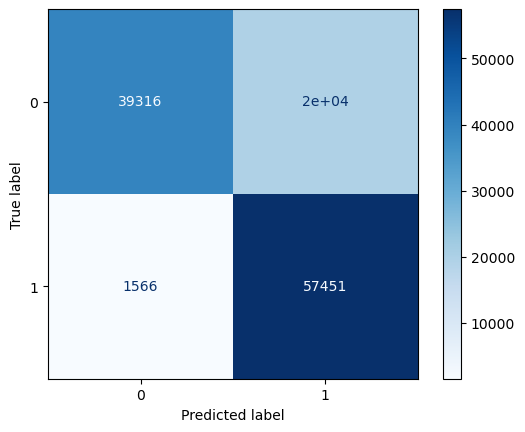

<Axes: >

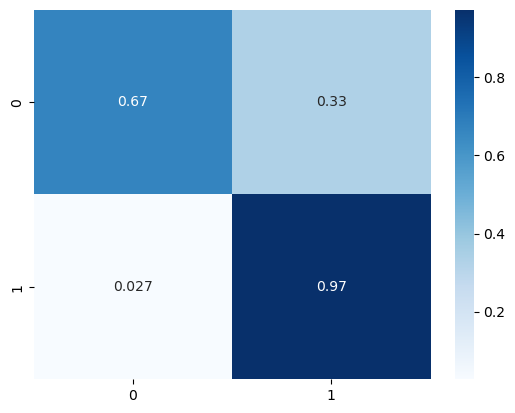

In [66]:
cmsvmln = confusion_matrix(y_test, predictionsvmln)
disp = ConfusionMatrixDisplay(confusion_matrix=cmsvmln)
disp.plot(cmap='Blues')
plt.show()

cm3 = cmsvmln / cmsvmln.sum(axis=1)[:, np.newaxis]

sns.heatmap(cm3, annot=True, cmap='Blues')


#### Poly Kernel

Se siguen los mismos pasos que los kernels anteriores

In [31]:
polysvm = SVC(kernel='poly', random_state=42, degree=3, class_weight='balanced')

polysvm.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': 'balanced',
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'poly',
 'max_iter': -1,
 'probability': False,
 'random_state': 42,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [32]:
indices = np.random.choice(X_train.shape[0], 1000, replace=False)  

X_train_sample = X_train[indices]
y_train_sample = y_train[indices]

param_grid = {
    'C': [100, 1000, 10000],
    'gamma' : ['scale', 'auto'],
    'coef0' : [0.001, 0.01, 0.1],

}

grid_search = GridSearchCV(polysvm, param_grid, cv=5, n_jobs=-1)

grid_search.fit(X_train_sample, y_train_sample)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")
print(f"Best estimator: {grid_search.best_estimator_}")

grid_search.best_estimator_polysvm = grid_search.best_estimator_

Best parameters: {'C': 10000, 'coef0': 0.1, 'gamma': 'scale'}
Best score: 0.858
Best estimator: SVC(C=10000, class_weight='balanced', coef0=0.1, kernel='poly', random_state=42)


In [33]:
indices = np.random.choice(X_train.shape[0], 1000, replace=False)  

X_train_sample = X_train[indices]
y_train_sample = y_train[indices]

bestsvm = grid_search.best_estimator_polysvm
bestsvm.fit(X_train_sample, y_train_sample)

predictionsvmpoly = bestsvm.predict(X_test)

accuracysvmpoly = accuracy_score(y_test, predictionsvmpoly)
recallsvmpoly = recall_score(y_test, predictionsvmpoly)
f1svmpoly = f1_score(y_test, predictionsvmpoly)

print(f"Accuracy: {accuracysvmpoly}")
print(f"Recall: {recallsvmpoly}")
print(f"F1 score: {f1svmpoly}")

print(f'Classification Report: \n {classification_report(y_test, predictionsvmpoly)}')

Accuracy: 0.8499796617063828
Recall: 0.8943168118452108
F1 score: 0.8561211303549223
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.81      0.84     59111
           1       0.82      0.89      0.86     58893

    accuracy                           0.85    118004
   macro avg       0.85      0.85      0.85    118004
weighted avg       0.85      0.85      0.85    118004



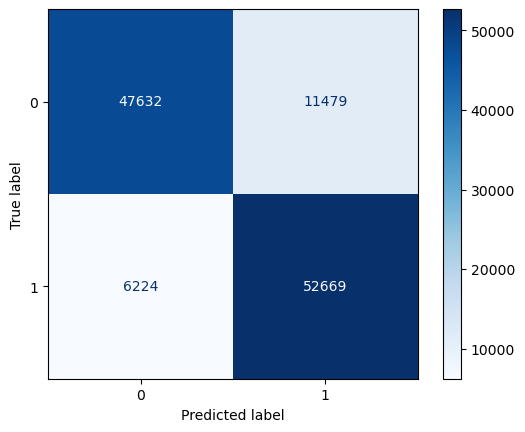

<Axes: >

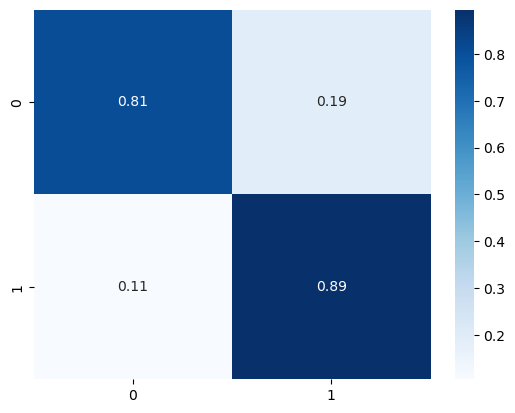

In [34]:
cmsvmpoly = confusion_matrix(y_test, predictionsvmpoly)
disp = ConfusionMatrixDisplay(confusion_matrix=cmsvmpoly)
disp.plot(cmap='Blues')
plt.show()

cm4 = cmsvmpoly / cmsvmpoly.sum(axis=1)[:, np.newaxis]

sns.heatmap(cm4, annot=True, cmap='Blues')

# Conclusiones

## Logistic Regression

Logistic Regression es un modelo ligero y facil de entrenar, pero no devuelve resultados satisfactorios en esta base de datos, una de las razones principales, es una baja correlacion de las caracteristicas dando un resultado de un promedio del 81% en las predicciones, pero tiene una tendencia a clasificar positivamente los datos [1] con un porcentaje del 97% al contrario del [0] con un porcentaje del 67%

## Support Vector Machine

Dada la gran cantidad de datos en la base de datos, fue dificil conseguir una medida exacta en los SVMs ya que el puro grid search podia llegar a tomar hasta 8hrs, por ello se decidio escoger un sample de la base de datos con la cual trabajar, dependiendo del kernel utilizado. 20k para el Gaussiano, 100k para el lineal, y 1k para el poly, dando el mejor resultado el SVM Gaussiano con un promedio del 88%.

Clasificando el [0] con un 87% y el [1] con un 89%